# LOAD DATASET TRAIN

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Hyperparameter configuration
EPOCH = 100
BATCH = 32
LEARNING_RATE = 1e-5

# Baca dataset dari CSV
file_path = 'sentiment_data.csv'  
df = pd.read_csv(file_path)

# Persiapkan data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'].values,
    df['sentiment'].values,
    test_size=0.2,
    random_state=42
)

# TRAIN DATASET

Unique sentiment values before mapping: ['Positive' 'Negative' 'Neutral']
Number of NaN values in sentiment column: 0




All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/100

5/5 [==============================] - ETA: 0s - loss: 1.0134 - accuracy: 0.4786
Epoch 1: val_loss improved from inf to 0.87945, saving model to model\checkpoint-01
INFO:tensorflow:Assets written to: model\checkpoint-01\assets


INFO:tensorflow:Assets written to: model\checkpoint-01\assets


5/5 [==============================] - 190s 29s/step - loss: 1.0134 - accuracy: 0.4786 - val_loss: 0.8794 - val_accuracy: 0.5556
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.8050 - accuracy: 0.6857
Epoch 2: val_loss improved from 0.87945 to 0.73858, saving model to model\checkpoint-02
INFO:tensorflow:Assets written to: model\checkpoint-02\assets


INFO:tensorflow:Assets written to: model\checkpoint-02\assets


5/5 [==============================] - 110s 27s/step - loss: 0.8050 - accuracy: 0.6857 - val_loss: 0.7386 - val_accuracy: 0.7222
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.6518 - accuracy: 0.8071
Epoch 3: val_loss improved from 0.73858 to 0.66345, saving model to model\checkpoint-03
INFO:tensorflow:Assets written to: model\checkpoint-03\assets


INFO:tensorflow:Assets written to: model\checkpoint-03\assets


5/5 [==============================] - 116s 28s/step - loss: 0.6518 - accuracy: 0.8071 - val_loss: 0.6635 - val_accuracy: 0.7778
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 0.4922 - accuracy: 0.9214
Epoch 4: val_loss improved from 0.66345 to 0.49963, saving model to model\checkpoint-04
INFO:tensorflow:Assets written to: model\checkpoint-04\assets


INFO:tensorflow:Assets written to: model\checkpoint-04\assets


5/5 [==============================] - 121s 30s/step - loss: 0.4922 - accuracy: 0.9214 - val_loss: 0.4996 - val_accuracy: 0.9167
Epoch 5/100
5/5 [==============================] - ETA: 0s - loss: 0.3448 - accuracy: 0.9786
Epoch 5: val_loss improved from 0.49963 to 0.36809, saving model to model\checkpoint-05
INFO:tensorflow:Assets written to: model\checkpoint-05\assets


INFO:tensorflow:Assets written to: model\checkpoint-05\assets


5/5 [==============================] - 117s 29s/step - loss: 0.3448 - accuracy: 0.9786 - val_loss: 0.3681 - val_accuracy: 0.9722
Epoch 6/100
5/5 [==============================] - ETA: 0s - loss: 0.2315 - accuracy: 0.9857
Epoch 6: val_loss improved from 0.36809 to 0.28206, saving model to model\checkpoint-06
INFO:tensorflow:Assets written to: model\checkpoint-06\assets


INFO:tensorflow:Assets written to: model\checkpoint-06\assets


5/5 [==============================] - 119s 29s/step - loss: 0.2315 - accuracy: 0.9857 - val_loss: 0.2821 - val_accuracy: 0.9444
Epoch 7/100
5/5 [==============================] - ETA: 0s - loss: 0.1450 - accuracy: 1.0000
Epoch 7: val_loss improved from 0.28206 to 0.25104, saving model to model\checkpoint-07
INFO:tensorflow:Assets written to: model\checkpoint-07\assets


INFO:tensorflow:Assets written to: model\checkpoint-07\assets


5/5 [==============================] - 120s 29s/step - loss: 0.1450 - accuracy: 1.0000 - val_loss: 0.2510 - val_accuracy: 0.9167
Epoch 8/100
5/5 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 1.0000
Epoch 8: val_loss improved from 0.25104 to 0.22303, saving model to model\checkpoint-08
INFO:tensorflow:Assets written to: model\checkpoint-08\assets


INFO:tensorflow:Assets written to: model\checkpoint-08\assets


5/5 [==============================] - 118s 29s/step - loss: 0.0904 - accuracy: 1.0000 - val_loss: 0.2230 - val_accuracy: 0.9167
Epoch 9/100
5/5 [==============================] - ETA: 0s - loss: 0.0604 - accuracy: 1.0000
Epoch 9: val_loss improved from 0.22303 to 0.19575, saving model to model\checkpoint-09
INFO:tensorflow:Assets written to: model\checkpoint-09\assets


INFO:tensorflow:Assets written to: model\checkpoint-09\assets


5/5 [==============================] - 118s 29s/step - loss: 0.0604 - accuracy: 1.0000 - val_loss: 0.1958 - val_accuracy: 0.9722
Epoch 10/100
5/5 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 1.0000
Epoch 10: val_loss did not improve from 0.19575
5/5 [==============================] - 15s 3s/step - loss: 0.0425 - accuracy: 1.0000 - val_loss: 0.1959 - val_accuracy: 0.9722
Epoch 11/100
5/5 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 1.0000
Epoch 11: val_loss improved from 0.19575 to 0.19095, saving model to model\checkpoint-11
INFO:tensorflow:Assets written to: model\checkpoint-11\assets


INFO:tensorflow:Assets written to: model\checkpoint-11\assets


5/5 [==============================] - 118s 29s/step - loss: 0.0308 - accuracy: 1.0000 - val_loss: 0.1910 - val_accuracy: 0.9722
Epoch 12/100
5/5 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 1.0000
Epoch 12: val_loss improved from 0.19095 to 0.18879, saving model to model\checkpoint-12
INFO:tensorflow:Assets written to: model\checkpoint-12\assets


INFO:tensorflow:Assets written to: model\checkpoint-12\assets


5/5 [==============================] - 121s 29s/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.1888 - val_accuracy: 0.9444
Epoch 13/100
5/5 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 1.0000
Epoch 13: val_loss did not improve from 0.18879
5/5 [==============================] - 15s 3s/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.1934 - val_accuracy: 0.9444
Epoch 14/100
5/5 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 1.0000
Epoch 14: val_loss did not improve from 0.18879
5/5 [==============================] - 15s 3s/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.1998 - val_accuracy: 0.9444
Epoch 15/100
5/5 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 1.0000
Epoch 15: val_loss did not improve from 0.18879
5/5 [==============================] - 15s 3s/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.2062 - val_accuracy: 0.9444
Epoch 16/100
5/5 [==============================] - ETA: 0s - lo

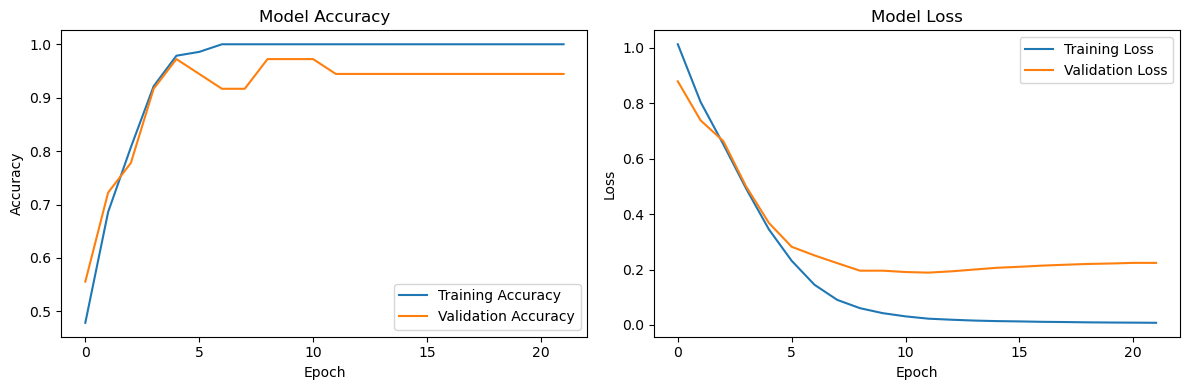

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Load dataset from CSV
file_path = 'sentiment_data.csv'  
df = pd.read_csv(file_path)

# Strip leading and trailing spaces from sentiment values
df['sentiment'] = df['sentiment'].str.strip()

# Check for unique values in the sentiment column
print("Unique sentiment values before mapping:", df['sentiment'].unique())

# Convert string labels to numerical labels
# Update mapping to include Neutral
df['sentiment'] = df['sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Check for NaN values after mapping
print("Number of NaN values in sentiment column:", df['sentiment'].isnull().sum())

# Drop rows with NaN values in the sentiment column
df = df.dropna(subset=['sentiment'])

# Ensure sentiment is of integer type
df['sentiment'] = df['sentiment'].astype(int)

# Prepare data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'].values,
    df['sentiment'].values,
    test_size=0.2,
    random_state=42
)

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = TFAutoModelForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=3  # Update to 3 labels
)

# Tokenize training data
train_encodings = tokenizer(
    list(train_texts),
    truncation=True,
    padding=True,
    max_length=1000,
    return_tensors='tf'
)

# Tokenize test data
test_encodings = tokenizer(
    list(test_texts),
    truncation=True,
    padding=True,
    max_length=1000,
    return_tensors='tf'
)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).shuffle(1000).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
)).batch(32)

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)

# Create a callback to save the model checkpoints
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model/checkpoint-{epoch:02d}',  # Save model with epoch in the filename
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode='min',  # Minimize the monitored quantity
    save_weights_only=False,  # Save the entire model
    verbose=1,  # Print messages when saving
    save_format='tf'  # Save in TensorFlow format
)

# Create an early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,  # Print messages when stopping
    mode='min',  # Stop when the quantity monitored has stopped decreasing
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=100,
    callbacks=[checkpoint_callback, early_stopping_callback]  # Add early stopping callback
)

# Save the trained model and tokenizer
model.save_pretrained("model")
tokenizer.save_pretrained("model")
print("Model and tokenizer saved to 'model' directory.")

# Visualize training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# MODEL EVALUATION

In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Load dataset from CSV
file_path = 'sentiment_data.csv'  
df = pd.read_csv(file_path)

# Strip leading and trailing spaces from sentiment values
df['sentiment'] = df['sentiment'].str.strip()

# Convert string labels to numerical labels
df['sentiment'] = df['sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Drop rows with NaN values in the sentiment column
df = df.dropna(subset=['sentiment'])

# Ensure sentiment is of integer type
df['sentiment'] = df['sentiment'].astype(int)

# Split the data the same way as in training
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'].values,
    df['sentiment'].values,
    test_size=0.2,
    random_state=42
)

# Load the saved model and tokenizer using os.path.join
model_dir = os.path.join("model") 
model = TFAutoModelForSequenceClassification.from_pretrained(model_dir)
tokenizer = AutoTokenizer.from_pretrained(model_dir)

# Tokenize test data
test_encodings = tokenizer(
    list(test_texts),
    truncation=True,
    padding=True,
    max_length=1000,
    return_tensors='tf'
)

# Get predictions
logits = model.predict(dict(test_encodings)).logits 
y_pred = np.argmax(logits, axis=1)

# Calculate metrics
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')

# Print results
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(test_labels, y_pred, target_names=['Negative', 'Positive', 'Neutral']))

# Optional: Print some example predictions
print("\nExample Predictions:")
for i in range(5):  # Show first 5 examples
    text = test_texts[i]
    true_label = "Positive" if test_labels[i] == 1 else "Negative" if test_labels[i] == 0 else "Neutral"
    pred_label = "Positive" if y_pred[i] == 1 else "Negative" if y_pred[i] == 0 else "Neutral"
    print(f"\nText: {text[:100]}...")  # Show first 100 characters
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {pred_label}")

Some layers from the model checkpoint at model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


2/2 [==============================] - 8s 194ms/step

Model Evaluation Metrics:
Accuracy: 0.9444
Precision: 0.9481
Recall: 0.9444
F1-Score: 0.9398

Detailed Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      1.00      0.96        11
    Positive       0.95      1.00      0.97        19
     Neutral       1.00      0.67      0.80         6

    accuracy                           0.94        36
   macro avg       0.96      0.89      0.91        36
weighted avg       0.95      0.94      0.94        36


Example Predictions:

Text: Lalu lintas sangat buruk...
True Label: Negative
Predicted Label: Negative

Text: Hasil yang mengecewakan...
True Label: Negative
Predicted Label: Negative

Text: Saya menghadiri seminar tentang pariwisata di sini...
True Label: Neutral
Predicted Label: Neutral

Text: Pengalaman yang tidak menyenangkan di toko...
True Label: Negative
Predicted Label: Negative

Text: Makanan itu tidak enak...
True Label: Neg

# MODEL TEST

In [ ]:
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import numpy as np
import os

def predict_sentiment(text, model, tokenizer):
    """
    Predict sentiment for given text
    """
    # Tokenize the text
    encodings = tokenizer(
        text,
        truncation=True,
        padding=True,
        max_length=1000,
        return_tensors='tf'
    )
    
    # Get prediction
    logits = model.predict(dict(encodings), verbose=0)[0]  # Set verbose=0 to hide prediction progress bar
    probabilities = tf.nn.softmax(logits, axis=1)
    prediction = np.argmax(logits, axis=1)[0]
    confidence = float(probabilities[0][prediction])
    
    return prediction, confidence

def main():
    # Load model and tokenizer
    print("Loading model and tokenizer...")
    model_path = r"C:\Users\dewam\Project Machine Learning and Data Science\sentiment-analysis\model"
    model = TFAutoModelForSequenceClassification.from_pretrained(model_path)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    print("Model loaded successfully!\n")
    
    while True:
        # Clear screen for better readability (works on both Windows and Unix)
        os.system('cls' if os.name == 'nt' else 'clear')
        
        print("=" * 50)
        print("Sentiment Analysis Testing")
        print("=" * 50)
        print("\nEnter your text to analyze (or type 'quit' to exit):")
        
        # Get input from user
        text = input("\n>>> ")
        
        # Check if user wants to quit
        if text.lower() == 'quit':
            print("\nThank you for using the sentiment analyzer!")
            break
        
        # Skip empty input
        if not text.strip():
            print("\nPlease enter some text!")
            input("\nPress Enter to continue...")
            continue
        
        print("\nAnalyzing sentiment...")
        prediction, confidence = predict_sentiment(text, model, tokenizer)
        
        # Display results
        print("\nResults:")
        print("-" * 20)
        print(f"Text: {text}")
        # Update the sentiment display logic to include Neutral
        sentiment_labels = ['Negative', 'Positive', 'Neutral']  # Updated to include Neutral
        print(f"Sentiment: {sentiment_labels[prediction]}")
        print(f"Confidence: {confidence:.2%}")
        print("-" * 20)
        
        # Wait for user input before continuing
        input("\nPress Enter to continue...")

if __name__ == "__main__":
    main()

Loading model and tokenizer...


Some layers from the model checkpoint at C:\Users\dewam\Project Machine Learning and Data Science\sentiment-analysis\model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at C:\Users\dewam\Project Machine Learning and Data Science\sentiment-analysis\model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClas

Model loaded successfully!

Sentiment Analysis Testing

Enter your text to analyze (or type 'quit' to exit):

Analyzing sentiment...

Results:
--------------------
Text: pemandangan itu sangat cantik
Sentiment: Positive
Confidence: 98.99%
--------------------
Sentiment Analysis Testing

Enter your text to analyze (or type 'quit' to exit):

Please enter some text!
Sentiment Analysis Testing

Enter your text to analyze (or type 'quit' to exit):

Please enter some text!
Sentiment Analysis Testing

Enter your text to analyze (or type 'quit' to exit):

Please enter some text!


# DATA TEST

## Cleaning Dataset Test


In [1]:
import pandas as pd
import re

# Load data from Excel file
excel_file_path = r"C:\Users\dewam\Project Machine Learning and Data Science\sentiment-analysis\sentiment_data_test.xlsx"
df = pd.read_excel(excel_file_path, header=None)

# Assign column names manually
df.columns = ['Name', 'Date', 'Sentiments'] 

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Function to clean text data
def clean_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)  # Retain only alphanumeric characters and spaces
    return text

# Apply the cleaning function to the 'Sentiments' column
df['Sentiments'] = df['Sentiments'].apply(clean_text)

# Display the cleaned data
print(df.head())

# Optionally, save the cleaned data to a new Excel file
cleaned_excel_file_path = r"C:\Users\dewam\Project Machine Learning and Data Science\sentiment-analysis\cleaned_sentiment_data.xlsx"
df.to_excel(cleaned_excel_file_path, index=False)
print(f"Cleaned data saved to {cleaned_excel_file_path}")

                Name       Date  \
0               Name        NaT   
1           Meyrisca 2022-04-01   
2   Hartonoswanopati 2022-05-01   
3  Backpacker Ngirit 2021-06-01   
4         Komaruddin 2021-12-01   

                                          Sentiments  
0                                         Sentiments  
1  Tak sekecil kelingking Sampai lokasi spot foto...  
2  Datanglah ke pantai ini untuk ambil spot foto ...  
3  pantai ter viral saat ini keren sekali nei pan...  
4  Pemandangannya luar biasa kuasa Allah sang pem...  
Cleaned data saved to C:\Users\dewam\Project Machine Learning and Data Science\sentiment-analysis\cleaned_sentiment_data.xlsx


C:\Users\dewam\AppData\Local\Temp\ipykernel_139764\3492194160.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


## Data Visualization

Loading model and tokenizer...




All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at C:\Users\dewam\Project Machine Learning and Data Science\sentiment-analysis\model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Model loaded successfully!


Analyzing sentiment for row 1...

Analyzing sentiment for row 2...

Analyzing sentiment for row 3...

Analyzing sentiment for row 4...

Analyzing sentiment for row 5...

Analyzing sentiment for row 6...

Analyzing sentiment for row 7...

Analyzing sentiment for row 8...

Analyzing sentiment for row 9...

Analyzing sentiment for row 10...

Analyzing sentiment for row 11...

Analyzing sentiment for row 12...

Analyzing sentiment for row 13...

Analyzing sentiment for row 14...

Analyzing sentiment for row 15...

Analyzing sentiment for row 16...

Analyzing sentiment for row 17...

Analyzing sentiment for row 18...

Analyzing sentiment for row 19...

Analyzing sentiment for row 20...

Analyzing sentiment for row 21...

Analyzing sentiment for row 22...

Analyzing sentiment for row 23...

Analyzing sentiment for row 24...

Analyzing sentiment for row 25...

Analyzing sentiment for row 26...

Analyzing sentiment for row 27...

Analyzing sentiment for row 28...



c:\Users\dewam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


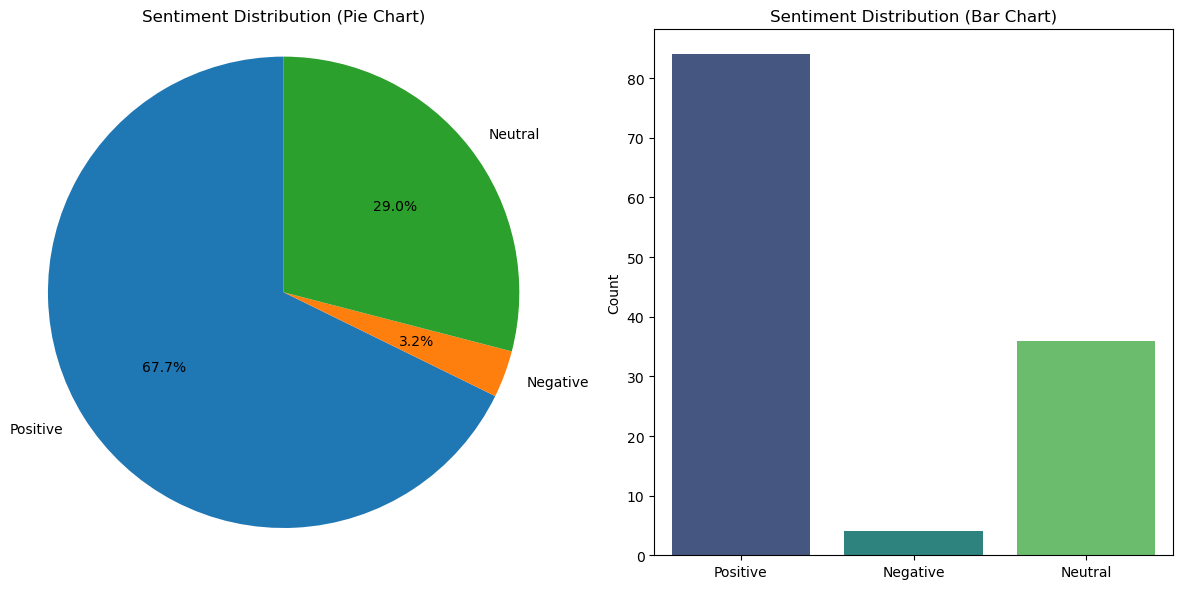

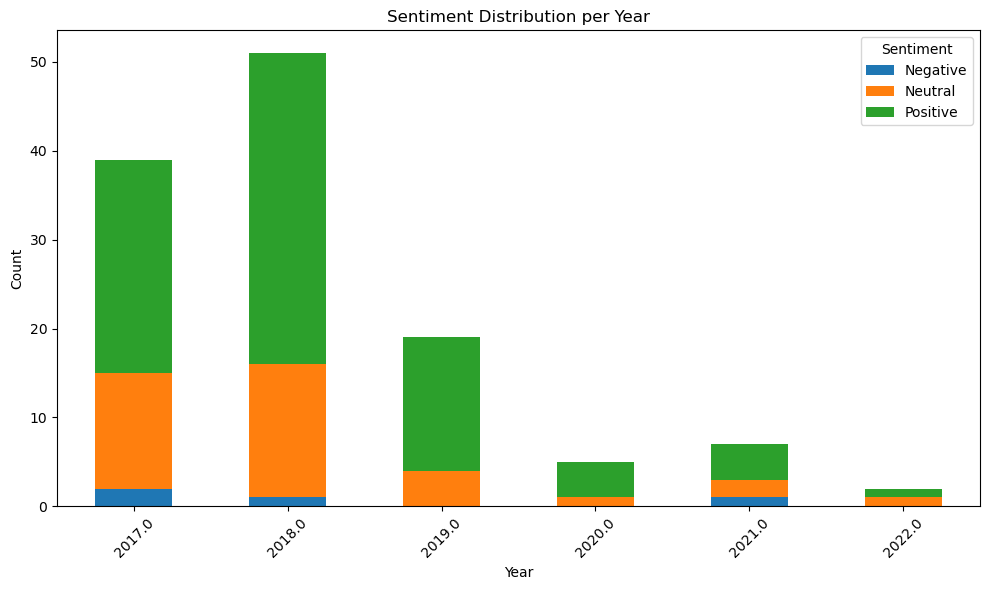


All Results:
--------------------
Text: Sentiments
Sentiment: Positive
Confidence: 73.90%
--------------------
Text: Tak sekecil kelingking Sampai lokasi spot foto ya ampun antrinya panjang amatkarena memang hanya disitulah spot terbaik Setelah antri 20 menitan yg bisa dilakukan hanya melihat sekitar laut Karena kalau mau turun sampai pantainya yg terkenal sangat indah membutuhkan waktu yg lama dan tenaga yg super kuat karena medan yg sangat berat
Sentiment: Neutral
Confidence: 46.71%
--------------------
Text: Datanglah ke pantai ini untuk ambil spot foto yang baik Ombaknya nampak indah tenang dinikmati dari atas tebing saat Septemberi pengunjung
Sentiment: Positive
Confidence: 62.41%
--------------------
Text: pantai ter viral saat ini keren sekali nei pantai kalau stamina kuat coba untuk turun kebawah rasain jernihnya air laut dan putihnya parnya yg lembut
Sentiment: Positive
Confidence: 88.18%
--------------------
Text: Pemandangannya luar biasa kuasa Allah sang pemilik alam panta

In [2]:
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def predict_sentiment(text, model, tokenizer):
    """
    Predict sentiment for given text
    """
    # Tokenize the text
    encodings = tokenizer(
        text,
        truncation=True,
        padding=True,
        max_length=1000,
        return_tensors='tf'
    )
    
    # Get prediction
    logits = model.predict(dict(encodings), verbose=0)[0]  # Set verbose=0 to hide prediction progress bar
    probabilities = tf.nn.softmax(logits, axis=1)
    prediction = np.argmax(logits, axis=1)[0]
    confidence = float(probabilities[0][prediction])
    
    # Define a threshold for neutral sentiment
    threshold = 0.5  # Adjust this threshold as needed
    if probabilities[0][0] < threshold and probabilities[0][1] < threshold:
        prediction = 2  # Assign Neutral if both positive and negative probabilities are low

    return prediction, confidence

def main():
    # Load model and tokenizer
    print("Loading model and tokenizer...")
    model_path = r"C:\Users\dewam\Project Machine Learning and Data Science\sentiment-analysis\model"
    model = TFAutoModelForSequenceClassification.from_pretrained(model_path, num_labels=3)  # 3 labels: Positive, Negative, Neutral
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    print("Model loaded successfully!\n")
    
    # Load cleaned data from Excel file
    cleaned_excel_file_path = r"C:\Users\dewam\Project Machine Learning and Data Science\sentiment-analysis\cleaned_sentiment_data.xlsx"
    
    # Load the cleaned Excel file
    df = pd.read_excel(cleaned_excel_file_path)

    # Check if the 'Sentiments' column exists
    if 'Sentiments' not in df.columns:
        print("The 'Sentiments' column does not exist in the provided Excel file.")
        return

    # Initialize counters for sentiments
    positive_count = 0
    negative_count = 0
    neutral_count = 0  # Counter for neutral sentiments
    results = []  # List to store results

    # Iterate through each Sentiments in the DataFrame
    for index, row in df.iterrows():
        text = row['Sentiments']  # Access the 'Sentiments' column
        
        # Skip empty input
        if not text.strip():
            print(f"Row {index + 1}: Empty Sentiments, skipping...")
            continue
        
        print(f"\nAnalyzing sentiment for row {index + 1}...")
        prediction, confidence = predict_sentiment(text, model, tokenizer)
        
        # Count sentiments
        if prediction == 0:
            negative_count += 1
            sentiment_label = 'Negative'
        elif prediction == 1:
            positive_count += 1
            sentiment_label = 'Positive'
        else:
            neutral_count += 1
            sentiment_label = 'Neutral'

        # Store results
        results.append({
            'Text': text,
            'Sentiment': sentiment_label,
            'Confidence': f"{confidence:.2%}",
            'Year': row['Date'].year if pd.notnull(row['Date']) else None  # Extract year from date
        })

    # Visualize the results
    visualize_results(positive_count, negative_count, neutral_count, results)

    # Display all results
    print("\nAll Results:")
    print("-" * 20)
    for result in results:
        print(f"Text: {result['Text']}")
        print(f"Sentiment: {result['Sentiment']}")
        print(f"Confidence: {result['Confidence']}")
        print("-" * 20)

def visualize_results(positive_count, negative_count, neutral_count, results):
    # Data for visualization
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [positive_count, negative_count, neutral_count]
    
    # Pie chart
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Sentiment Distribution (Pie Chart)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Bar chart for overall sentiment distribution
    plt.subplot(1, 2, 2)
    sns.barplot(x=labels, y=sizes, palette='viridis')
    plt.title('Sentiment Distribution (Bar Chart)')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

    # Analyze sentiment per year
    sentiment_per_year = pd.DataFrame(results).groupby(['Year', 'Sentiment']).size().unstack(fill_value=0)
    
    # Bar chart for sentiment distribution per year
    sentiment_per_year.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Sentiment Distribution per Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()